<a href="https://colab.research.google.com/github/Nishikanta059/Paper-Implementation/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# LeNet5 Architecture

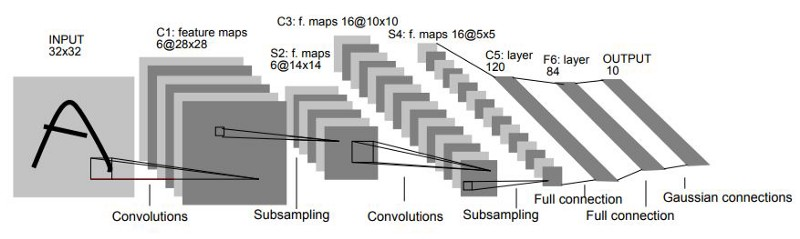

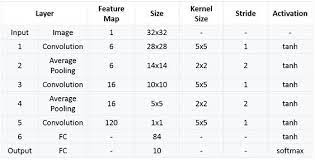

In [3]:

model = keras.Sequential(
    [

        layers.Conv2D(6,5,activation='tanh',input_shape=(28,28,1)),
        layers.AveragePooling2D(strides=(2,2)),
        layers.Conv2D(16,5,activation='tanh'),
        layers.AveragePooling2D(strides=(2,2)),
  layers.Flatten(),
        layers.Dense(120,activation='tanh'),

        layers.Dense(84,activation='tanh'),
        layers.Dense(10,activation='softmax')




    ]
)


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

# *MNIST Dataset*

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 15s 6ms/step - loss: 0.3585 - accuracy: 0.8960 - val_loss: 0.1563 - val_accuracy: 0.9546
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1309 - accuracy: 0.9600 - val_loss: 0.1012 - val_accuracy: 0.9683
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0889 - accuracy: 0.9729 - val_loss: 0.0789 - val_accuracy: 0.9743
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0682 - accuracy: 0.9795 - val_loss: 0.0639 - val_accuracy: 0.9814
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0544 - accuracy: 0.9830 - val_loss: 0.0608 - val_accuracy: 0.9802
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.0533 - val_accuracy: 0.9829
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0497 - val_accuracy: 0.9848
Epoch

In [13]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


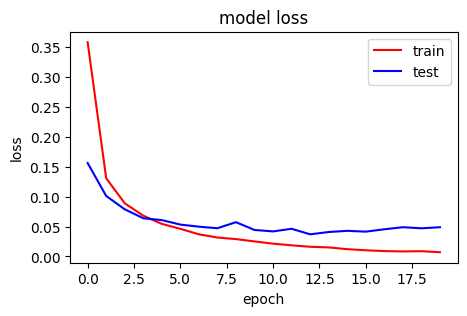

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

# Paper reference loss vs epochs
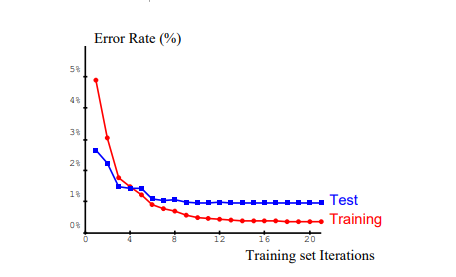

# Fashion MNIST

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [10]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


x_train=x_train/255
x_test=x_test/255

y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [31]:
hist2=model.fit(x_train,y_train,batch_size=128,epochs=90,validation_data=(x_test,y_test))

Epoch 1/90
469/469 [==============================] - 3s 5ms/step - loss: 0.1890 - accuracy: 0.9292 - val_loss: 0.3167 - val_accuracy: 0.8951
Epoch 2/90
469/469 [==============================] - 2s 5ms/step - loss: 0.1895 - accuracy: 0.9284 - val_loss: 0.3114 - val_accuracy: 0.8944
Epoch 3/90
469/469 [==============================] - 2s 5ms/step - loss: 0.1855 - accuracy: 0.9305 - val_loss: 0.3300 - val_accuracy: 0.8898
Epoch 4/90
469/469 [==============================] - 2s 5ms/step - loss: 0.1839 - accuracy: 0.9322 - val_loss: 0.3230 - val_accuracy: 0.8927
Epoch 5/90
469/469 [==============================] - 3s 6ms/step - loss: 0.1830 - accuracy: 0.9311 - val_loss: 0.3241 - val_accuracy: 0.8912
Epoch 6/90
469/469 [==============================] - 3s 6ms/step - loss: 0.1799 - accuracy: 0.9325 - val_loss: 0.3176 - val_accuracy: 0.8935
Epoch 7/90
469/469 [==============================] - 2s 5ms/step - loss: 0.1784 - accuracy: 0.9325 - val_loss: 0.3181 - val_accuracy: 0.8952
Epoch 

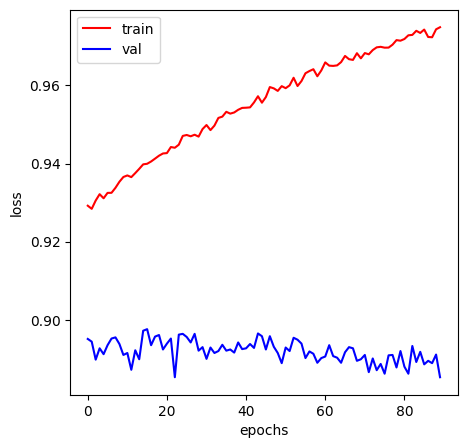

In [34]:
plt.figure(figsize=(5,5))
plt.plot(hist2.history['accuracy'],color='r')
plt.plot(hist2.history['val_accuracy'],color='b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# Conclusion

* LeNet 5 Model perfroms well in **MNIST** digit recognition dataset but

*   it is not performing well on **Fashion MNIST** dataset, it overfits the dataset.


We experimented with 'relu' activation function, its giving similar results.

So more dropout layers and convolutional layers needed for this more complex fashion MNIST dataset.